Цей датасет містить інформацію про користувачів мобільного застосунку. Він включає унікальний ідентифікатор користувача, середній час, проведений у застосунку, витрати, наявність відгуків, оцінки, кількість запитів на зміну пароля, час з останнього відвідування та статус використання застосунку.

Проведіть сегментацію користувачів та проаналізуйте їх, щоб визначити ключові характеристики та поведінкові особливості різних груп.

План дій:
- Огляд даних
- Предобробка даних
- Кластерний аналіз
- Аналіз даних
- Висновки

In [68]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
!ls

Untitled.ipynb	userbehaviour.csv


In [3]:
df = pd.read_csv('userbehaviour.csv')

# Огляд даних

In [4]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [6]:
df.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


In [7]:
df.describe(include='object')

,Status
count,999
unique,2
top,Installed
freq,916


In [8]:
df.duplicated().sum()

0

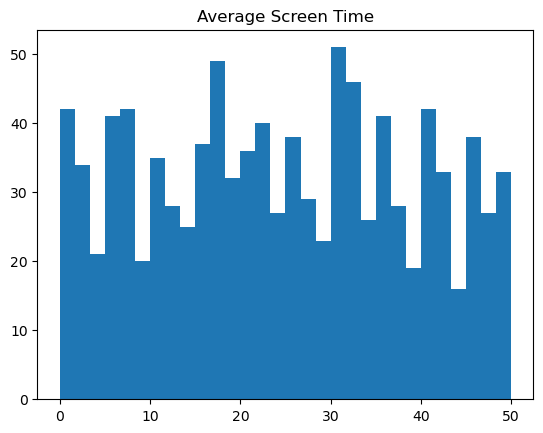

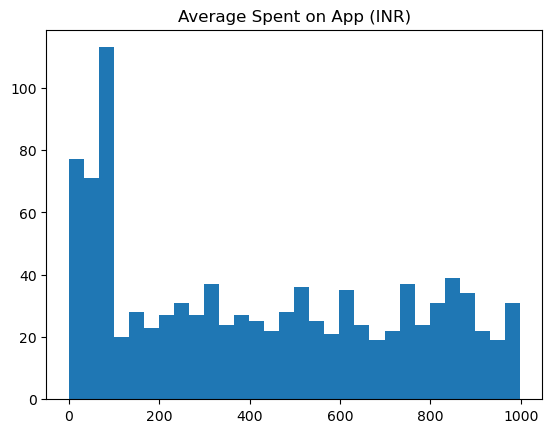

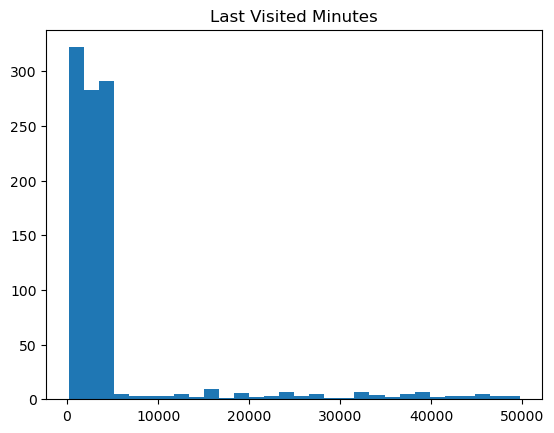

In [9]:
for i in ['Average Screen Time', 'Average Spent on App (INR)', 'Last Visited Minutes']:
    plt.hist(df[i], bins=30)
    plt.title(i)
    plt.show();

# Предобробка даних

In [10]:
new_columns = ['_'.join(i.lower().replace(' (inr)', '').split()) for i in df.columns]
df.columns = new_columns

In [11]:
df['status'] = df['status'].replace({'Installed': 1, 'Uninstalled': 0})

In [12]:
df.head()

,userid,average_screen_time,average_spent_on_app,left_review,ratings,new_password_request,last_visited_minutes,status
0,1001,17.0,634.0,1,9,7,2990,1
1,1002,0.0,54.0,0,4,8,24008,0
2,1003,37.0,207.0,0,8,5,971,1
3,1004,32.0,445.0,1,6,2,799,1
4,1005,45.0,427.0,1,5,6,3668,1


# Кластерний аналіз 

In [13]:
df_copy = df.drop('userid', axis=1)

In [14]:
mm = MinMaxScaler()
mm.fit(df_copy)

df_mm = mm.transform(df_copy)
df_mm = pd.DataFrame(data=df_mm, columns=df_copy.columns)

In [15]:
df_mm.head()

,average_screen_time,average_spent_on_app,left_review,ratings,new_password_request,last_visited_minutes,status
0,0.34,0.635271,1.0,0.9,0.428571,0.056328,1.0
1,0.00,0.054108,0.0,0.4,0.500000,0.480814,0.0
2,0.74,0.207415,0.0,0.8,0.285714,0.015551,1.0
3,0.64,0.445892,1.0,0.6,0.071429,0.012077,1.0
4,0.90,0.427856,1.0,0.5,0.357143,0.070021,1.0


In [16]:
df_mm.describe()

,average_screen_time,average_spent_on_app,left_review,ratings,new_password_request,last_visited_minutes,status
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.487808,0.425266,0.497497,0.651351,0.281567,0.099162,0.916917
std,0.284708,0.312992,0.500244,0.270151,0.198902,0.173527,0.276146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.096192,0.000000,0.500000,0.142857,0.026144,1.000000
50%,0.480000,0.394790,0.000000,0.700000,0.285714,0.053803,1.000000
75%,0.720000,0.718938,1.000000,0.900000,0.428571,0.080725,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.describe()

,userid,average_screen_time,average_spent_on_app,left_review,ratings,new_password_request,last_visited_minutes,status
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899,0.916917
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516,0.276146
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000,0.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000,1.000000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000,1.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000,1.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000,1.000000


In [98]:
!pip install umap-learn

In [179]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

In [132]:
def cluster_plot(df, labels):
    for method in [TSNE(2), PCA(2), umap.UMAP(n_components=2)]:
        X = method.fit_transform(df)
        X = pd.DataFrame(data=X, columns=['x', 'y'])
        sns.scatterplot(data=X, x='x', y='y', hue=labels)
        
        plt.title(method)
        plt.show();

## K-means

In [140]:
score = {}
index, sse = 0, 0
range_l = list(range(2, 10))
for i in range_l:
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(df_mm)
    score[i] = kmeans.inertia_

    sc = silhouette_score(df_mm, labels)
    if sc > sse:
        index = i
        sse = sc
        
print(f'index {index}, silhouette_score {sse}')

index 3, silhouette_score 0.4640695479065694


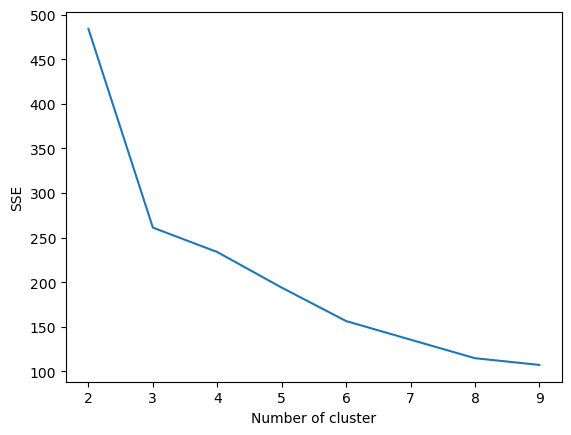

In [190]:
plt.plot(list(score.keys()), list(score.values()))

plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.show();

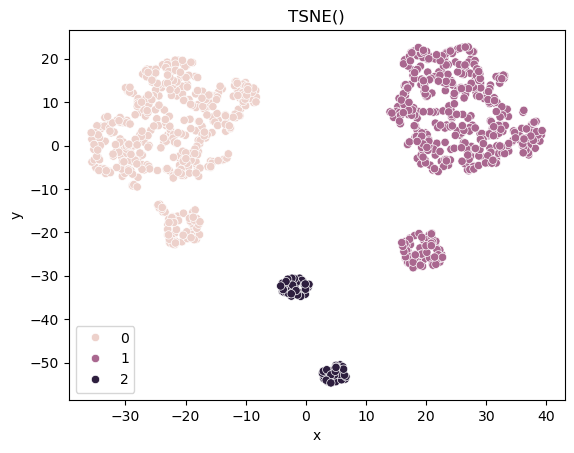

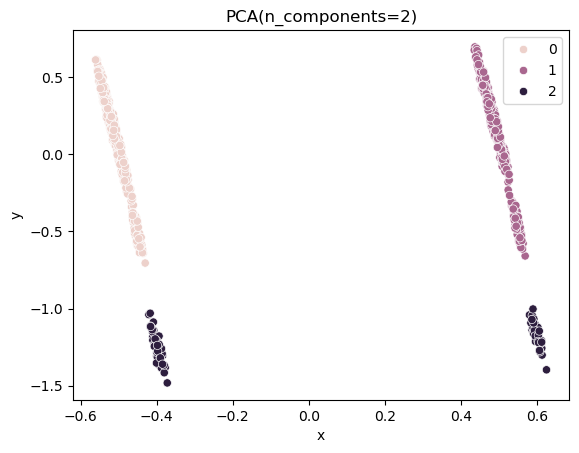

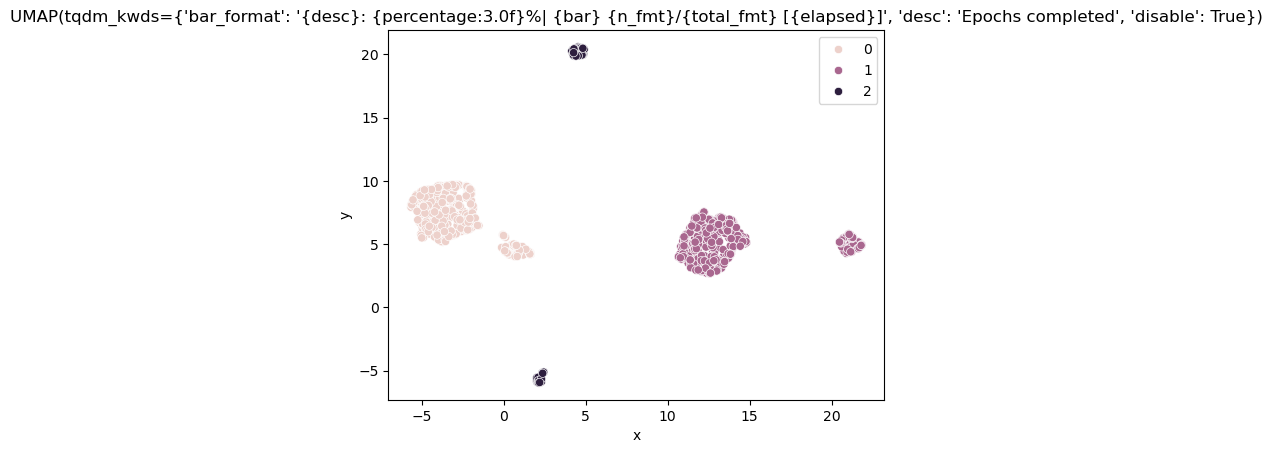

In [191]:
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(df_mm)

cluster_plot(df_mm, kmeans_labels)

## DBSCAN

In [177]:
for i in np.linspace(0.1, 0.7, 7):
    for s in [5, 7, 10]:
        dbscan = DBSCAN(eps=i, min_samples=s)
        labels = dbscan.fit_predict(df_mm)

        if -1 in labels or len(set(labels)) == 1:
            print(f'eps {i}, min_samples {s}, continue, {set(labels)}')
            continue
        print(f'eps {i}, min_samples {s}, кількість кластерів {len(set(labels))}, silhouette_score {silhouette_score(df_mm, labels)}')

eps 0.1, min_samples 5, continue, {0, 1, 2, 3, 4, 5, -1}
eps 0.1, min_samples 7, continue, {0, 1, -1}
eps 0.1, min_samples 10, continue, {-1}
eps 0.2, min_samples 5, continue, {0, 1, 2, 3, 4, 5, 6, 7, -1}
eps 0.2, min_samples 7, continue, {0, 1, 2, 3, 4, 5, -1}
eps 0.2, min_samples 10, continue, {0, 1, 2, 3, -1}
eps 0.3, min_samples 5, continue, {0, 1, 2, 3, -1}
eps 0.3, min_samples 7, continue, {0, 1, 2, 3, -1}
eps 0.3, min_samples 10, continue, {0, 1, 2, 3, -1}
eps 0.4, min_samples 5, кількість кластерів 4, silhouette_score 0.4666340556605767
eps 0.4, min_samples 7, кількість кластерів 4, silhouette_score 0.4666340556605767
eps 0.4, min_samples 10, кількість кластерів 4, silhouette_score 0.4666340556605767
eps 0.5, min_samples 5, кількість кластерів 4, silhouette_score 0.4666340556605767
eps 0.5, min_samples 7, кількість кластерів 4, silhouette_score 0.4666340556605767
eps 0.5, min_samples 10, кількість кластерів 4, silhouette_score 0.4666340556605767
eps 0.6, min_samples 5, кількіст

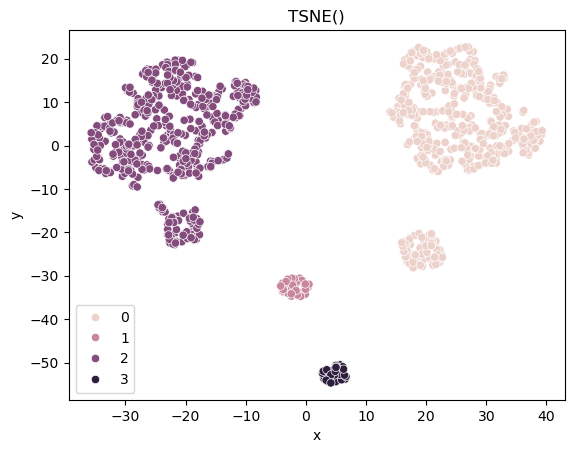

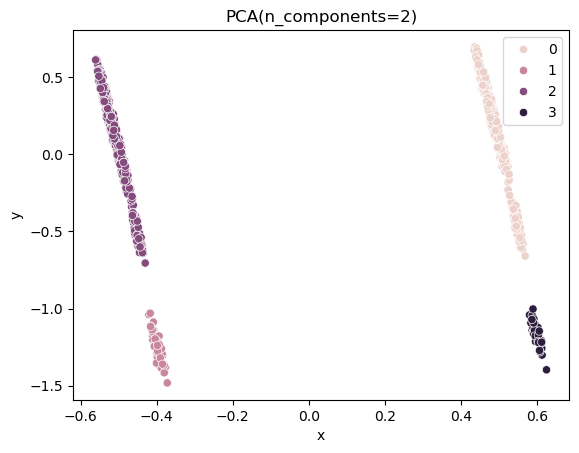

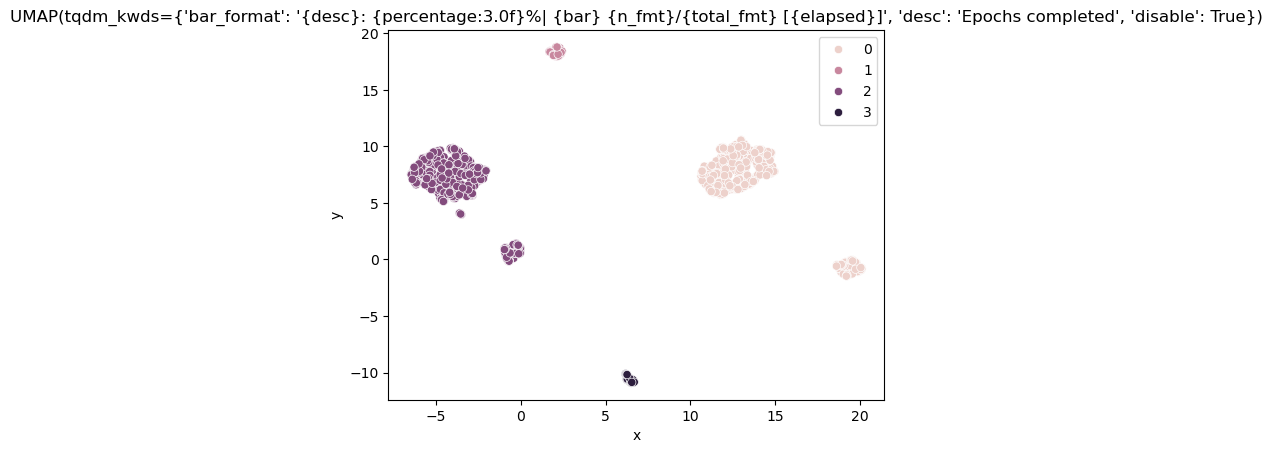

In [189]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_mm)

cluster_plot(df_mm, dbscan_labels)

## GaussianMixture

In [186]:
for i in range(1, 8):
    gaus = GaussianMixture(n_components=i)
    labels = gaus.fit_predict(df_mm)
    
    if -1 in labels or len(set(labels)) == 1:
        print(f'n_components {i}, continue, {set(labels)}')
        continue
    print(f'n_components {i}, кількість кластерів {len(set(labels))}, silhouette_score {silhouette_score(df_mm, labels)}')

n_components 1, continue, {0}
n_components 2, кількість кластерів 2, silhouette_score 0.40550438538434014
n_components 3, кількість кластерів 3, silhouette_score 0.4640695479065694
n_components 4, кількість кластерів 4, silhouette_score 0.4069532299389957
n_components 5, кількість кластерів 5, silhouette_score 0.4412596440514518
n_components 6, кількість кластерів 6, silhouette_score 0.4216550059573925
n_components 7, кількість кластерів 7, silhouette_score 0.311886667210314


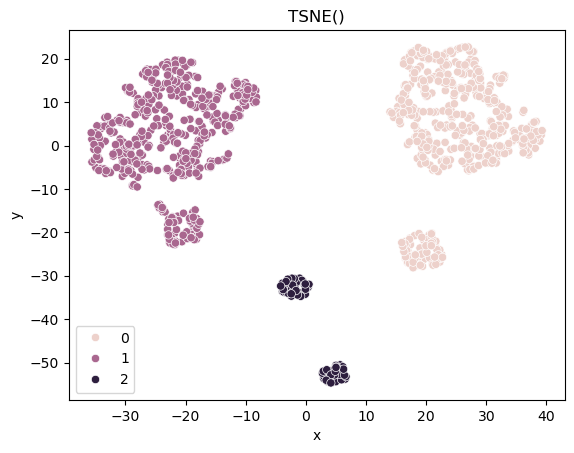

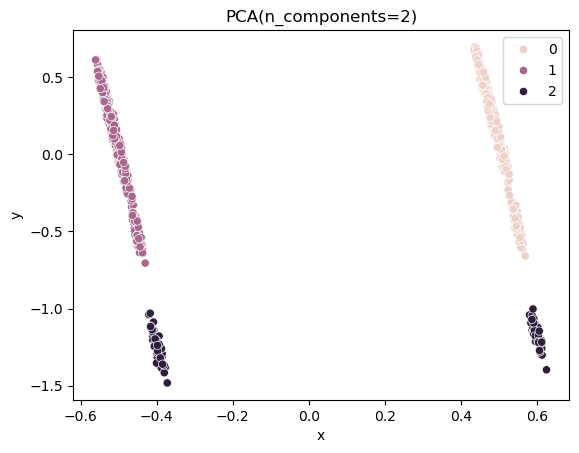

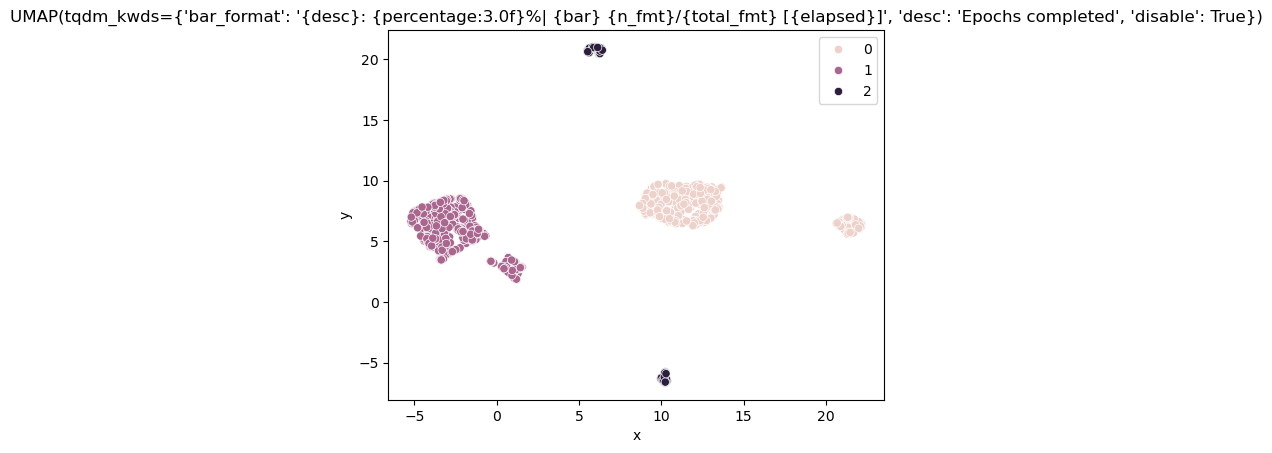

In [192]:
gaus = GaussianMixture(n_components=3)
gaus_labels = gaus.fit_predict(df_mm)

cluster_plot(df_mm, gaus_labels)

# Аналіз даних

In [194]:
df['label'] = gaus_labels

In [195]:
df.head()

,userid,average_screen_time,average_spent_on_app,left_review,ratings,new_password_request,last_visited_minutes,status,label
0,1001,17.0,634.0,1,9,7,2990,1,0
1,1002,0.0,54.0,0,4,8,24008,0,2
2,1003,37.0,207.0,0,8,5,971,1,1
3,1004,32.0,445.0,1,6,2,799,1,0
4,1005,45.0,427.0,1,5,6,3668,1,0


In [209]:
# кількість користувачів в кластері

df['label'].value_counts()

label
0    458
1    458
2     83
Name: count, dtype: int64

In [210]:
# кількість користувачів які видалили застосунок

df['status'].value_counts()

status
1    916
0     83
Name: count, dtype: int64

In [211]:
# середне значення тих, хто видалил застосунок по кластерам

df.groupby('label')['status'].mean()

label
0    1.0
1    1.0
2    0.0
Name: status, dtype: float64

In [212]:
# кількість користувачів які залишили відгук, без тих, хто видалив застосунок

df[df['status'] == 1]['left_review'].value_counts()

left_review
1    458
0    458
Name: count, dtype: int64

In [213]:
# середне значення тих, хто залишив відгук по кластерам

df.groupby('label')['left_review'].mean()

label
0    1.00000
1    0.00000
2    0.46988
Name: left_review, dtype: float64

Першим фактором, який врахував алгоритм, стала колонка 'status' (кластер 3) — чи видалив користувач додаток. Другим фактором була колонка 'left_review' (кластер 1 — так, кластер 2 — ні) — чи залишив користувач відгук.

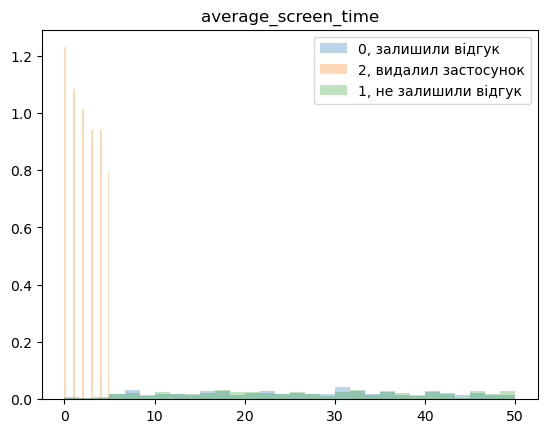

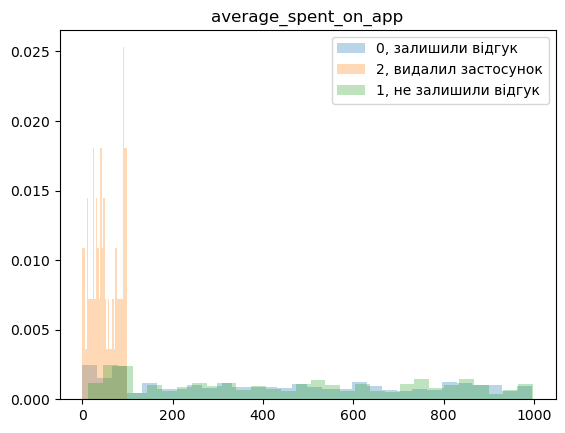

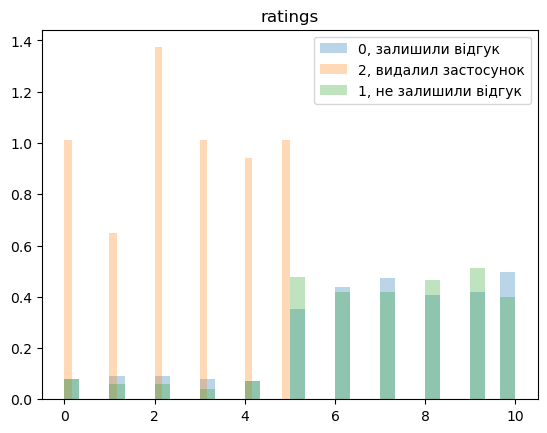

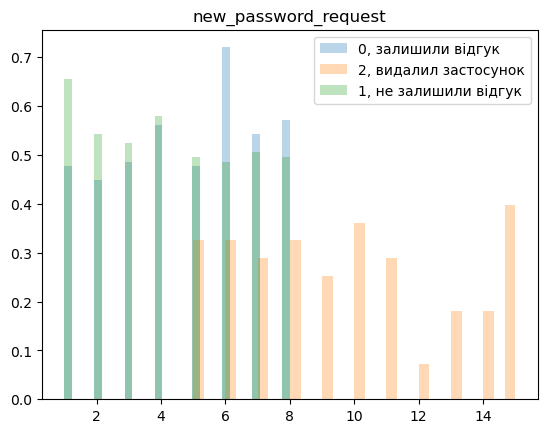

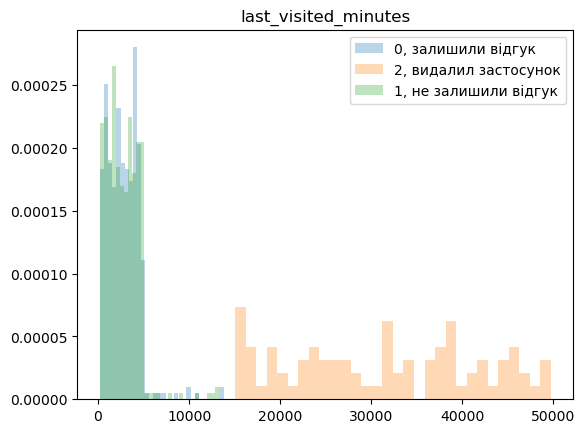

In [221]:
columns = ['average_screen_time', 'average_spent_on_app', 'ratings', 
           'new_password_request', 'last_visited_minutes']

for i in columns:
    for c in df['label'].unique():
        if c == 0:
            label = f'{c}, залишили відгук'
        elif c == 1:
            label = f'{c}, не залишили відгук'
        elif c == 2:
            label = f'{c}, видалил застосунок'
        plt.hist(df[df['label'] == c][i], density=True, bins=30, alpha=0.3, label=label)
        
    plt.title(i)
    plt.legend()
    plt.show()

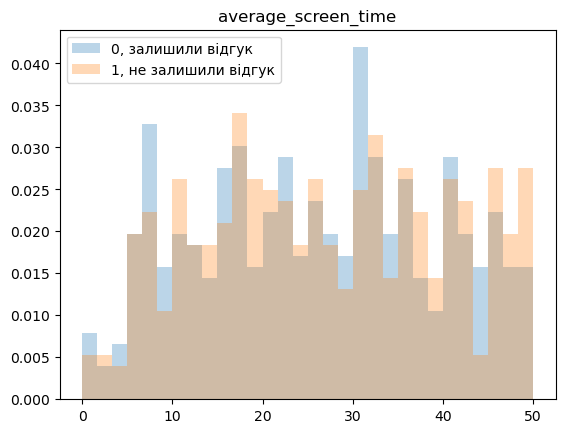

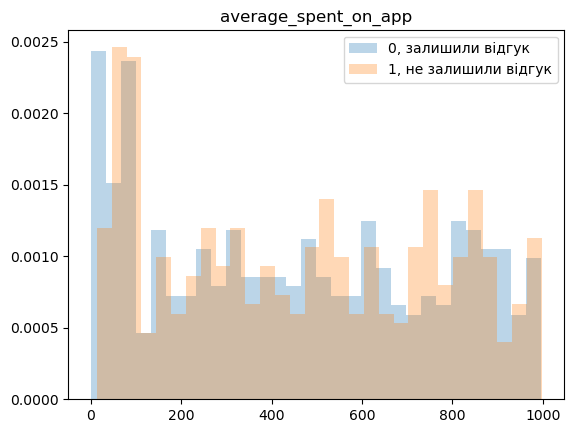

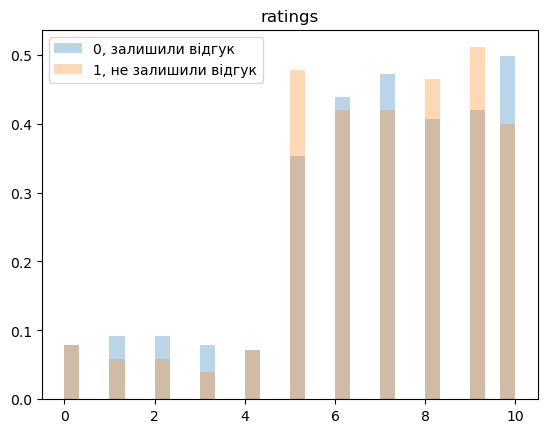

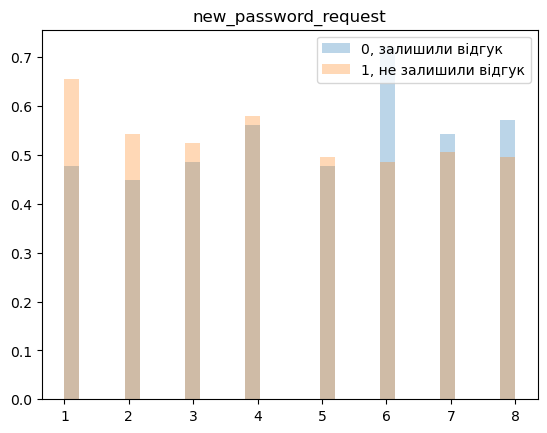

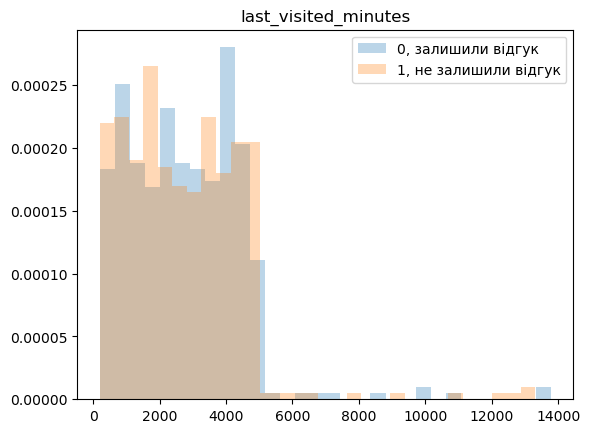

In [222]:
for i in columns:
    for c in df['label'].unique():
        if c == 2:
            continue
        elif c == 0:
            label = f'{c}, залишили відгук'
        elif c == 1:
            label = f'{c}, не залишили відгук'

        plt.hist(df[df['label'] == c][i], density=True, bins=30, alpha=0.3, label=label)
        
    plt.title(i)
    plt.legend()
    plt.show()

In [243]:
for i in columns + ['left_review', 'status']:
    aggfunc = 'mean'
    if i in ['average_spent_on_app', 'last_visited_minutes']:
        aggfunc = 'median'
    # for cat in ['left_review', 'status']:
    print(f'{i}, {aggfunc}')
    print(df.groupby('label')[i].agg(aggfunc))
    print('\n')

average_screen_time, mean
label
0    25.967249
1    26.820961
2     2.277108
Name: average_screen_time, dtype: float64


average_spent_on_app, median
label
0    434.5
1    470.0
2     47.0
Name: average_spent_on_app, dtype: float64


ratings, mean
label
0    6.834061
1    6.912664
2    2.542169
Name: ratings, dtype: float64


new_password_request, mean
label
0    4.703057
1    4.325328
2    9.662651
Name: new_password_request, dtype: float64


last_visited_minutes, median
label
0     2698.5
1     2579.0
2    31950.0
Name: last_visited_minutes, dtype: float64


left_review, mean
label
0    1.00000
1    0.00000
2    0.46988
Name: left_review, dtype: float64


status, mean
label
0    1.0
1    1.0
2    0.0
Name: status, dtype: float64




# Висновки

### Кластерний аналіз виділив три групи користувачів:
- перший кластер: користувачі, які використовують додатком та залишають відгуки
- другий кластер: користувачі, які використовують додаток, але не залишають відгуків
- третій кластер: користувачі, які видалили додаток

Дані свідчать, що показники третього кластера є найгіршими серед усіх:
- середня тривалість сесії найнижча (1: 25.9 хв, 2: 26.8 хв, **3: 2.3 хв**)
- мінімальні витрати грошей у додатку (1: 434, 2: 470, **3: 47**)
- найнижчий рейтинг у магазині додатків (1: 6.8, 2: 6.9, **3: 2.5**)
- найбільша частота зміни пароля (1: 4.7, 2: 4.3, **3: 9.7**)
- у 50% випадків залишали відгуки

Різниця між першим і другим кластерами
- у користувачів другого кластера тривалість сесії трохи довша (26.8 хв проти 25.9 хв)
- другий кластер витрачає більше коштів у додатку (470 проти 434)
- користувачі другого кластера вище оцінюють додаток (6.9 проти 6.8)
- частота зміни паролів у другому кластері нижча (4.3 проти 4.7)
- медіанне значення кількості входів у додаток вище у другого кластера (2579 проти 2698)


### Особливості третього кластера
Третій кластер є найпроблемнішим, адже всі його користувачі видалили додаток. 
Відмінні риси:
- частота зміни пароля вдвічі вища, а тривалість сесії у 10 разів коротша, ніж у інших кластерів
- низька оцінка у магазині додатків свідчить про низький рівень задоволеності додатком
- ймовірно, користувачі цього кластеру часто стикалися з технічними проблемами

**Водночас, половина користувачів цього кластера залишала відгуки. Аналіз цих відгуків допоможе виявити основні проблеми та їх вирішити. Важливо зазначити, що навіть ці користувачі здійснювали витрати в додатку. Орієнтуючись на поведінку користувачів, хто залишає низькі оцінки та часто змінює паролі, можна виявити тих, хто може залишити додаток назавжди і спробувати зробити з цим щось.**


### Висновки
Загалом, низький рейтинг у магазині додатків та часта зміна пароля є непоганим індикаторами погіршення ставлення користувачів до додатку. Уважний моніторинг цих показників та аналіз негативних відгуків дозволять покращити користувацький досвід і утримати аудиторію.